In [2]:

from google.colab import drive

drive.mount('/content/gdrive')


#zip_path = base/’/content/gdrive/MyDrive/Eurosat Dataset/euro.zip’
!unzip "/content/gdrive/MyDrive/Eurosat Dataset/euro.zip" -d "/content"


#!rm euro.zip

%matplotlib inline
import numpy as np
import tensorflow as tf

#import tflearn
#from tflearn.layers.conv import conv_2d, max_pool_2d
#from tflearn.layers.core import input_data, dropout, fully_connected
#from tflearn.layers.estimator import regression

import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD 

import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import cv2 as cv

Streaming output truncated to the last 5000 lines.
  inflating: /content/2750/Forest/Forest_2339.jpg  
  inflating: /content/2750/Forest/Forest_2063.jpg  
  inflating: /content/2750/Forest/Forest_107.jpg  
  inflating: /content/2750/Forest/Forest_2760.jpg  
  inflating: /content/2750/Forest/Forest_2516.jpg  
  inflating: /content/2750/Forest/Forest_1792.jpg  
  inflating: /content/2750/Forest/Forest_1718.jpg  
  inflating: /content/2750/Forest/Forest_2575.jpg  
  inflating: /content/2750/Forest/Forest_1316.jpg  
  inflating: /content/2750/Forest/Forest_1598.jpg  
  inflating: /content/2750/Forest/Forest_1573.jpg  
  inflating: /content/2750/Forest/Forest_1755.jpg  
  inflating: /content/2750/Forest/Forest_503.jpg  
  inflating: /content/2750/Forest/Forest_2404.jpg  
  inflating: /content/2750/Forest/Forest_1067.jpg  
  inflating: /content/2750/Forest/Forest_1277.jpg  
  inflating: /content/2750/Forest/Forest_1024.jpg  
  inflating: /content/2750/Forest/Forest_1527.jpg  
  inflating: /c

In [3]:
path = "/home/ayush/Desktop/Manas/TensorFlow/Eurosat Dataset/2750"
path = "/content/2750"

cats = [                                #CATEGORIES
    "AnnualCrop",
    "Forest",
    "HerbaceousVegetation",
    "Highway",
    "Industrial",
    "Pasture",
    "PermanentCrop",
    "Residential",
    "River",
    "SeaLake"]




  0%|          | 0/10 [00:00<?, ?it/s]

AnnualCrop


 10%|█         | 1/10 [00:00<00:04,  2.14it/s]

Forest


 20%|██        | 2/10 [00:00<00:03,  2.16it/s]

HerbaceousVegetation


 30%|███       | 3/10 [00:01<00:03,  2.13it/s]

Highway


 40%|████      | 4/10 [00:01<00:02,  2.17it/s]

Industrial


 50%|█████     | 5/10 [00:02<00:02,  2.26it/s]

Pasture


 60%|██████    | 6/10 [00:02<00:01,  2.53it/s]

PermanentCrop


 70%|███████   | 7/10 [00:02<00:01,  2.47it/s]

Residential


 80%|████████  | 8/10 [00:03<00:00,  2.36it/s]

River


 90%|█████████ | 9/10 [00:03<00:00,  2.45it/s]

SeaLake


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


(64, 64)


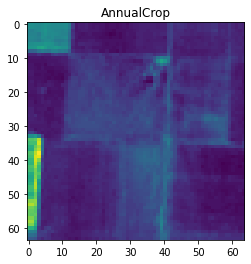

In [4]:
def label_img(label):
    j = 0
    one_hot = np.zeros(10)
    ind = cats.index(label)
    one_hot[ind] = 1
    return one_hot

def hot_lab(ls):
    ind = np.where(ls == 1)
    print(ind)
    return cats[ind]

ims = []
labs = []
labs_txt = []
def create_train_data():
    j = 0
    #ims = []
    #labs = []
    train_data = []
    f = 0
    for cat in tqdm(cats):
        pth, dirs, files = next(os.walk(path+"/"+cats[j]))
        file_count = len(files)
        print(cat)
        
        for i in range(1, file_count):
            
            path_full = (path+"/"+cats[j]+"/"+cats[j]+"_"+str(i)+".jpg")
            #print(path_full)
            
            img1 = cv.imread(path_full, cv.IMREAD_GRAYSCALE)
            
            img1 = img1.astype('float32')
            img1 /= 255.0
            

            #img1 = cv.resize(img1, (50, 50))
            ims.append(img1)
            labs.append( label_img(cats[j]))
            labs_txt.append(cats[j])
            label = label_img(cats[j])
            #train_data.append((np.array(img1), np.array(label)))

        j+=1
    return train_data



train_data = create_train_data()
#print(train_data[0][0].shape)

print(ims[0].shape)
plt.imshow(ims[0])
plt.title(labs_txt[0])
plt.show()



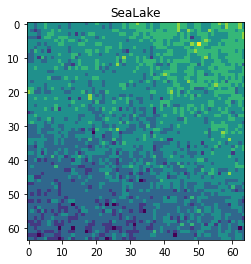

In [5]:
train_x = np.array(ims)
train_x.shape

train_y = np.array(labs_txt)
train_y.shape

splitter = []

for (i, j) in zip(train_x, train_y):
    splitter.append((i, j))

    


ind = 26978
plt.imshow(train_x[ind])
plt.title(train_y[ind])
plt.show()

In [6]:
np.random.shuffle(splitter)
X = []
Y = []
for i in splitter:
    X.append(i[0])
    Y.append(i[1])
    

In [7]:
train_x = np.array(X[:-2699]); train_xx = np.copy(train_x)
train_y = np.array(Y[:-2699])

test_x = np.array(X[-2699:])
test_y = np.array(Y[-2699:])

train_x = train_x.reshape(24291, 1, 64, 64)
train_x = torch.from_numpy(train_x)

num_y = []
for i in train_y:
    num_y.append(cats.index(i))
   
train_y = np.array(num_y)
train_y = train_y.astype(int)
train_y = torch.from_numpy(train_y)

test_x = test_x.reshape(2699, 1, 64, 64)
test_x = torch.from_numpy(test_x)

num_test_y = []
for i in test_y:
    num_test_y.append(cats.index(i))
test_y = np.array(num_test_y)
test_y = test_y.astype(int)
test_y = torch.from_numpy(test_y)

test_x.shape, test_y.shape
#ind = 55
#plt.imshow(train_xx[ind])
#plt.title(cats[train_y[ind]])
#plt.show()



(torch.Size([2699, 1, 64, 64]), torch.Size([2699]))

24291


In [49]:


class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
           
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(1024, 120),
            Linear(120, 60),
            Linear(60, 10),
        )

    
    def forward(self, x):
        x = self.cnn_layers(x)
        #print('X.shape = ',x.shape)
        #print('x.size(0) = ',x.size(0) )
        x = x.view(x.size(0), 1024)
        #print('X.shape (after x.view) = ',x.shape)

        

        x = self.linear_layers(x)
        #print(x.shape)
        return x


#model = Net()
#print(list(model.parameters()))


In [50]:
from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.Tensor(train_x) # transform to torch tensor
tensor_y = torch.Tensor(train_y/1.0)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset) # create your dataloader



In [51]:
model = Net()
optimizer = SGD(model.parameters(), lr=0.001,momentum=0.9)

criterion = CrossEntropyLoss()

if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()


  

optimizer.zero_grad()


  
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(my_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = labels.type(torch.LongTensor)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')



[1,  2000] loss: 1.788
[1,  4000] loss: 1.480
[1,  6000] loss: 1.327
[1,  8000] loss: 1.240
[1, 10000] loss: 1.213
[1, 12000] loss: 1.181
[1, 14000] loss: 1.141
[1, 16000] loss: 1.207
[1, 18000] loss: 1.170
[1, 20000] loss: 1.145
[1, 22000] loss: 1.187
[1, 24000] loss: 1.120
[2,  2000] loss: 1.135
[2,  4000] loss: 1.161
[2,  6000] loss: 1.120
[2,  8000] loss: 1.092
[2, 10000] loss: 1.092
[2, 12000] loss: 1.080
[2, 14000] loss: 1.053
[2, 16000] loss: 1.127
[2, 18000] loss: 1.109
[2, 20000] loss: 1.092
[2, 22000] loss: 1.112
[2, 24000] loss: 1.048
Finished Training


In [55]:
PATH = './eurosat_net.pth'

torch.save(model.state_dict(), PATH)


2699
2699


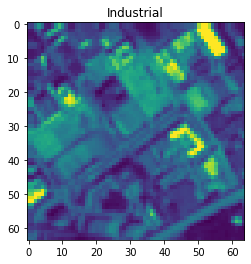

Predicted:  Residential


In [88]:
num_test_x = np.array(X[-2699:])
print(len(num_test_x))

print(len(num_test_y))
ind = 224
plt.imshow(num_test_x[ind])
plt.title(cats[num_test_y[ind]])
plt.show()

outputs = model(test_x)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', cats[predicted[ind]])

In [90]:
tensor_x = torch.Tensor(test_x) # transform to torch tensor
tensor_y = torch.Tensor(test_y/1.0)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
testloader = DataLoader(my_dataset) # create your dataloader



In [91]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


"def train(epoch):\n    model.train()\n    tr_loss = 0\n    \n    x_train, y_train = Variable(train_x), Variable(train_y)\n    \n    x_test, y_test = Variable(test_x), Variable(test_y)\n    \n    if torch.cuda.is_available():\n\n        x_train = x_train.cuda()\n        y_train = y_train.cuda()\n        \n        x_test = x_testeurosat.cuda()\n        y_test = y_test.cuda()\n        \n\n    optimizer.zero_grad()\n    \n     \n    \n    out_train = model(x_train)\n    out_test = model(x_test)\n    \n    loss_train = criterion(out_train, y_train)\n    \n    loss_val = criterion(out_test, y_test)\n    \n    train_losses.append(loss_train)\n    val_losses.append(loss_val)\n    \n    loss_train.backward()\n    optimizer.step()\n    tr_loss = loss_train.item()\n    \n    if epoch % 2==0:\n        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)\n        \n "

'epochs = 25\n\ntrain_losses = []\nval_losses = []\n\nfor epoch in range(epochs):\n    train(epoch)\n  '